In [ ]:
pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=d445c6606e902add15a0f122d22cc7bd37538f8ff47b50a4459085a2eb524203
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the Keras model
model = load_model('keras_model.h5')

# Define the path to the folder containing test images
test_data_folder = "/content/drive/MyDrive/Testing_Data"

# Get a list of all image files in the test data folder
test_image_paths = [os.path.join(test_data_folder, f) for f in os.listdir(test_data_folder) if os.path.isfile(os.path.join(test_data_folder, f))]

# Extract true labels from the filenames
true_labels = [os.path.splitext(os.path.basename(f))[0][-1] for f in test_image_paths]

# Define the target size for image preprocessing
target_size = (224, 224)  # Adjust this according to the input size expected by your model

# Preprocess test images
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)  # Preprocess input according to MobileNetV2 requirements
    return img_array

# Make predictions
predicted_labels = []
probabilities = []  # Initialize empty list to store probabilities
for image_path in test_image_paths:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Add a batch dimension (required for prediction)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

    # Make prediction
    prediction = model.predict(preprocessed_image)

    # Store probabilities
    probabilities.append(prediction[0])

    # Assuming prediction is one-hot encoded, get the index of the predicted class
    predicted_class_index = np.argmax(prediction)
    predicted_labels.append(label_map[predicted_class_index])

# Convert probabilities list to numpy array
probabilities = np.array(probabilities)

# Now you can use probabilities for further evaluation, such as ROC curve or ROC-AUC score calculation

1/1 [==============================] - 0s 34ms/step


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        60
           B       1.00      1.00      1.00        60
           C       1.00      1.00      1.00        60
           D       0.00      0.00      0.00        64
           E       0.00      0.00      0.00        60
           F       1.00      1.00      1.00        60
           G       1.00      1.00      1.00        60
           H       0.00      0.00      0.00        60
           I       0.00      0.00      0.00        60
           K       0.00      0.00      0.00        60
           L       0.00      0.00      0.00        60
           M       1.00      1.00      1.00        60
           N       1.00      1.00      1.00        60
           O       1.00      1.00      1.00        60
           P       1.00      1.00      1.00        60
           Q       1.00      1.00      1.00        60
           R       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ran

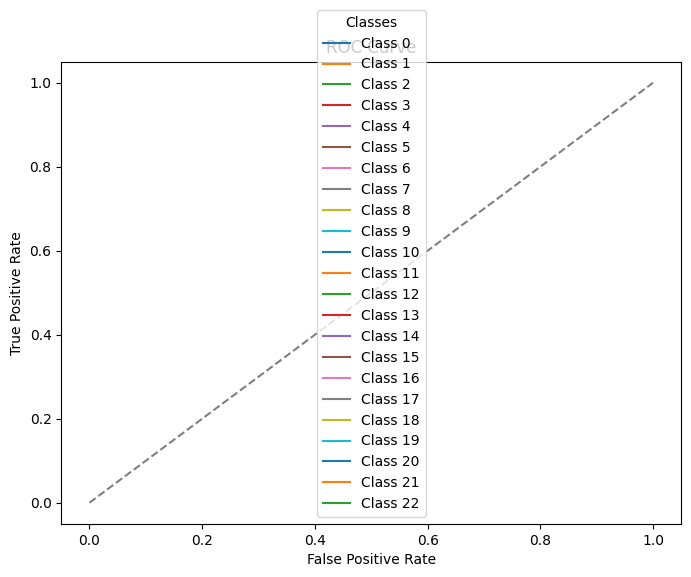

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Compute ROC-AUC score
auc = roc_auc_score(true_labels, probabilities, multi_class='ovr', average='macro')
print(f"Macro-average ROC-AUC Score: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(label_map)):
    fpr, tpr, _ = roc_curve(true_labels, probabilities[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(title='Classes')
plt.show()

[[60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0

Text(50.722222222222214, 0.5, 'True')

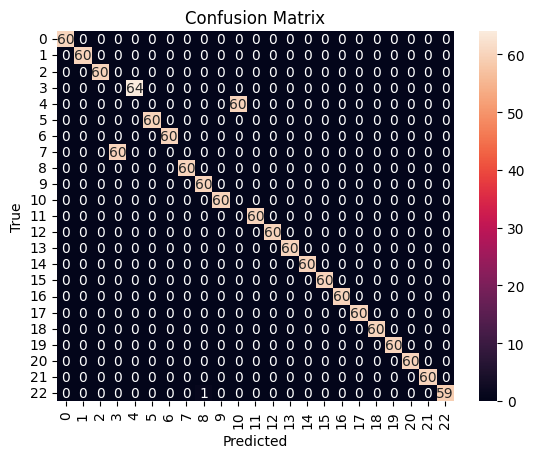

In [ ]:
import seaborn as sb

matrix = confusion_matrix(true_labels, predicted_labels)
print(matrix)
sb.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')